In [1]:
# -- library/testing.ipynb --
# Author: Jake Cray
# GitHub: crayjake/fgw-python
''' example usage for library '''

' example usage for library '

In [2]:
from structures import *
from generate import generate
from schemes import CrankNicolsonDeep
from converters import converter
from animate import display

import numpy as np

In [3]:
# define the metadata -> sets up our environment
meta = Meta(
    js        = np.array(list(range(2, 3))),
    width     = 540 / 2,   # 540 km  ->  270km/150ms-1 = 1800s = 30min
    depth     = 50,        # 50 km
    h         = 100,       # scale height/depth is 100 km
    time      = 60*60*48 ,   # 4 hrs
    T         = 60*10,     # 30 mins
    sponge    = 1 * 1 / 4,   # fraction of width to use as sponge layer
    damping   = -1 * 6,   # sponge damping strength
    dt        = 10,        # timestep is 60 secs
    saveEvery = 600          # only save every 60 States
)

Starting metadata generation
Setting up the space
Generating finite difference matrices
Generating Crank-Nicolson matrices
Deep atmosphere!
Using a sponge layer
spongeStrength: -0.014102523883317073
c_max: 158.65339368731708
spongeWidth: 67500.0
Alpha: -0.01398992933263267, 0.0


In [4]:
# generate the data using the CrankNicolsonDeep step
data = generate(meta=meta, step=CrankNicolsonDeep)

 15%|█▍        | 421/2879 [00:03<00:21, 115.11it/s]/home/jake/Documents/fgw-python/library/schemes.py:78: RuntimeWarning: overflow encountered in true_divide
  p = (inp.p[i] + ((dt * c_jSquared) * (((w + inp.w[i]) / 2) - S_j))) / (1 + (dt * al))
/home/jake/Documents/fgw-python/library/schemes.py:80: RuntimeWarning: overflow encountered in add
  rho = ((1 / g) * (inp.p[i] + p)) - inp.rho[i] # -(1/g)(dp/dz)
/home/jake/Documents/fgw-python/library/schemes.py:71: RuntimeWarning: overflow encountered in multiply
  U = (B @ inp.u[i]) + (dt * f * inp.v[i] * (2 + (dt * al)) / 2) - (dt * (D1 @ (inp.p[i] * (2 + (dt * al)) / 2))) + ((dt ** 2) * (c_jSquared) * (D1 @ S_j) / 2)
/home/jake/Documents/fgw-python/library/schemes.py:71: RuntimeWarning: invalid value encountered in matmul
  U = (B @ inp.u[i]) + (dt * f * inp.v[i] * (2 + (dt * al)) / 2) - (dt * (D1 @ (inp.p[i] * (2 + (dt * al)) / 2))) + ((dt ** 2) * (c_jSquared) * (D1 @ S_j) / 2)
100%|██████████| 2879/2879 [00:24<00:00, 118.18it/s]


MetaAlpha from display: -0.0


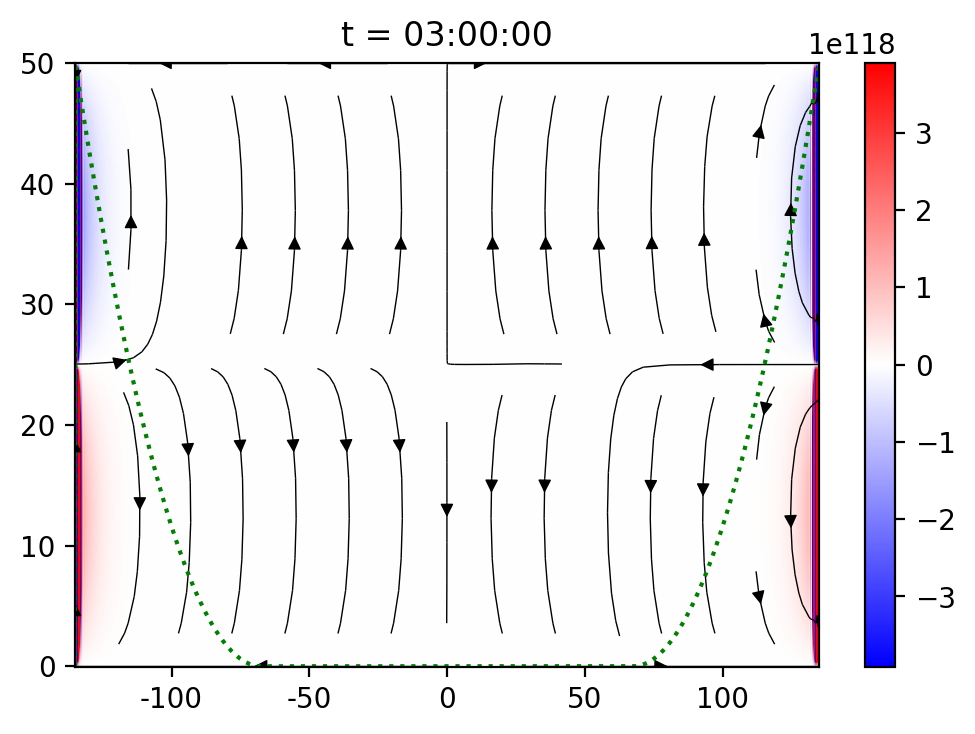

In [9]:
def singleModeConverter(data, meta):
    return converter(data, meta, 2)

display(data[3], meta, converter, sponge=False)
#display(data[63], meta, converter, sponge=False)